# Week9 Paet1: Fall Detection using YOLO

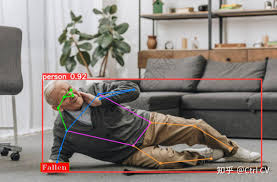

## Lode model YOLOV11: Pose Estimate

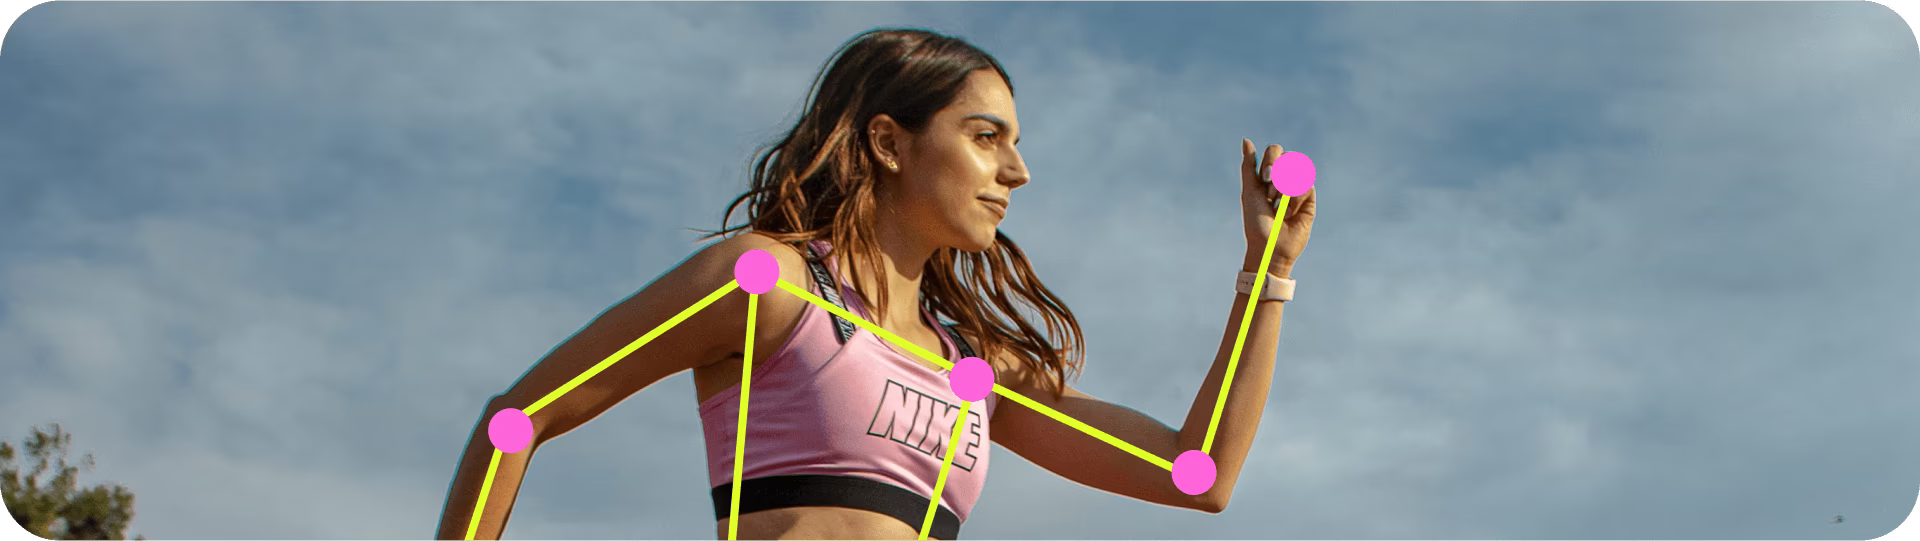

https://docs.ultralytics.com/tasks/pose/

In [3]:
#%pip install "ultralytics<=8.3.40" supervision roboflow

In [4]:
import cv2
import numpy as np
from ultralytics import YOLO

# 1. Load the YOLO11n-Pose model
# This model is capable of detecting human keypoints :skeleton.
model = YOLO(r"C:\Users\jinny\Desktop\cv\YOLO\yolo11n-pose.pt")
# 2. Video Capture, Use 0 for Webcam
cap = cv2.VideoCapture(0)

# While loop
while cap.isOpened():
    # Read a frame from the webcam
    success, frame = cap.read()
    if not success:
        break
    # 3. Run model
    # 'stream=True' is recommended for processing video streams efficiently.
    # 'verbose=False' keeps the console log clean.
    #results = model(frame, stream=True, verbose=False)
    results = model(frame)#predict

    # Foreach in results
    for result in results:
        
       
        # 4. The .plot() method automatically draws the bounding boxes 
        # and the skeleton (keypoints) onto the frame.
        annotated_frame = result.plot()
        

        # 5. Extract Keypoints Data. Shape: (number_of_people, 17 keypoints, 2 coordinates[x,y])
        keypoint = result.keypoints.xy.cpu().numpy()  # Convert to NumPy array for easier handling
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes for each detected person
        # 6. Loop through each detected person
        for i, person_kps in enumerate(keypoint):
            
            # Check if vital body parts are detected (values > 0)
            if np.all(person_kps[[5, 6, 11, 12]]):
                #index: 
                # 5=Left Shoulder, 
                # 6=Right Shoulder, 
                # 11=Left Hip, 
                # 12=Right Hip

                # 7. Calculate Body Orientation
                
                # Find the midpoint of Shoulders (Upper Body)
                shoulder_x = (person_kps[5][0] + person_kps[6][0]) /2
                shoulder_y = (person_kps[5][1] + person_kps[6][1]) /2
    
                # Find the midpoint of Hips (Lower Body)
                hip_x = (person_kps[11][0] + person_kps[12][0]) /2
                hip_y = (person_kps[11][1] + person_kps[12][1]) /2

                # Calculate Distances (width and height)
                # Horizontal distance 
                dx = abs(shoulder_x - hip_x)
                dy = abs(shoulder_y - hip_y)
                # Vertical distance 

                # 8. **** Fall Detection Method ****
                # If the body's horizontal width (dx) is significantly larger 
                # than its vertical height (dy), the person is likely lying down.
                threshold = 1.2 
                if dx > (dy * threshold):
                    
                    # FALL DETECTED ACTION ^-^
                    
                    # Draw a RED LINE connecting shoulder to hip 
                    cv2.line(annotated_frame, 
                             (int(shoulder_x), int(shoulder_y)), 
                              (int(hip_x), int(hip_y)), 
                              (0, 0, 255), 
                              4
                            )
                

                    # Add "FALL DETECTED" text above bounding box
                    if len(boxes) > i:
                        x1, y1, x2, y2 = map(int, boxes[i])
                        cv2.putText(annotated_frame, 
                                    "FALL DETECTED", 
                                    (x1, y1 - 20), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 
                                    0.9, 
                                    (0, 0, 255), 
                                    2
                                   )
                  

        # 9. Display the Result
        cv2.imshow("YOLO Pose - Fall Detection", annotated_frame)

    # 10. Press 'q' on the keyboard to stop the program.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



0: 480x640 3 persons, 29.2ms
Speed: 21.5ms preprocess, 29.2ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 persons, 26.2ms
Speed: 4.5ms preprocess, 26.2ms inference, 10.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 persons, 19.9ms
Speed: 3.3ms preprocess, 19.9ms inference, 6.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 21.8ms
Speed: 2.2ms preprocess, 21.8ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 20.4ms
Speed: 2.9ms preprocess, 20.4ms inference, 6.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 20.2ms
Speed: 2.1ms preprocess, 20.2ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 18.2ms
Speed: 1.9ms preprocess, 18.2ms inference, 6.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 3 persons, 24.9ms
Speed: 1.8ms preprocess, 24.9ms inference, 3.7ms postprocess per image at shape